In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [12]:
sps= df.species.unique()
spsdict={}
for i in sps:
    spsdict[i]= df[df['species']== i ]

In [13]:
for i in spsdict:
    print(spsdict[i])

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

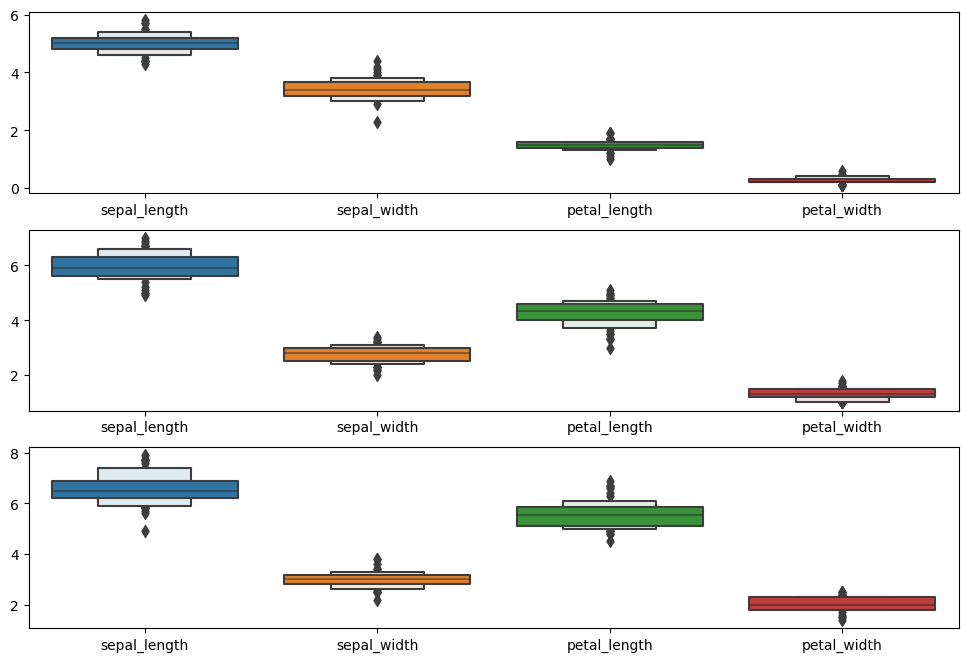

In [17]:
j=1
plt.figure(figsize=(12,8))
for i in spsdict:
    plt.subplot(3,1,j)
    sns.boxenplot(spsdict[i])
    j = j+1

<Axes: >

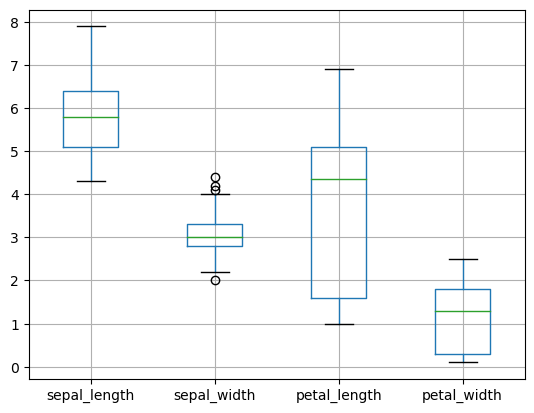

In [19]:
df.boxplot()

In [21]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import metrics
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.33, random_state=42)

classifier= GaussianNB()
classifier.fit(x_train, y_train)

y_pred= classifier.predict(x_test)


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      0.93      0.93        15
   virginica       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



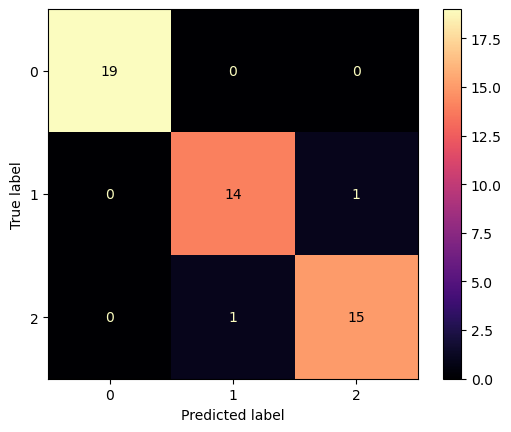

In [38]:
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix)
cm_display.plot(cmap= 'magma')

In [37]:
help(cm_display.plot)

Help on method plot in module sklearn.metrics._plot.confusion_matrix:

plot(*, include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format=None, ax=None, colorbar=True, im_kw=None, text_kw=None) method of sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay instance
    Plot visualization.
    
    Parameters
    ----------
    include_values : bool, default=True
        Includes values in confusion matrix.
    
    cmap : str or matplotlib Colormap, default='viridis'
        Colormap recognized by matplotlib.
    
    xticks_rotation : {'vertical', 'horizontal'} or float,                          default='horizontal'
        Rotation of xtick labels.
    
    values_format : str, default=None
        Format specification for values in confusion matrix. If `None`,
        the format specification is 'd' or '.2g' whichever is shorter.
    
    ax : matplotlib axes, default=None
        Axes object to plot on. If `None`, a new figure and axes is
        crea